# Project: Questionary Data with Pandas (Thanksgiving Statistics)

<br>

## Questions to address:
- Process questionary data using Pandas
- Create frequency tables for Age and Household income of the people that answered the questionary
- Find out how much people travel and what desserts do they have for thanksgiving
- Find out the average age and income for people attending a friendsgiving

<br>

## Tools:
- Frequency tables using pandas value counts (Series.value_counts().sort_index())
- pie charts
- Indexing using pandas
- plot table
- table + bar plot
- pivot tables

<br>

### load defaults

In [213]:
import pandas as pd
import re
import numpy as np
import requests 

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
import matplotlib.dates as mdates

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green', '#9E80BA', '#8EDB8E', '#58517A']
Ncolors = 10
color_map = plt.cm.Blues_r(np.linspace(0.2, 0.5, Ncolors))
#color_map = plt.cm.tab20c_r(np.linspace(0.2, 0.5, Ncolors))

<br>

## Dataset: Online survey about what Americans eat for Thanksgiving dinner

In [2]:
full_data=pd.read_csv('./data/thanksgiving.csv', encoding='Latin-1')

print("Number of responses: %d\n\nExtract of questions asked:" % (len(full_data)))
for ii in full_data.columns:
    if(len(ii)<100):
        print(ii)

Number of responses: 1058

Extract of questions asked:
RespondentID
Do you celebrate Thanksgiving?
What is typically the main dish at your Thanksgiving dinner?
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)
How is the main dish typically cooked?
How is the main dish typically cooked? - Other (please specify)
What kind of stuffing/dressing do you typically have?
What kind of stuffing/dressing do you typically have? - Other (please specify)
What type of cranberry saucedo you typically have?
What type of cranberry saucedo you typically have? - Other (please specify)
Do you typically have gravy?
Do you typically pray before or after the Thanksgiving meal?
How far will you travel for Thanksgiving?
What's the age cutoff at your "kids' table" at Thanksgiving?
Have you ever tried to meet up with hometown friends on Thanksgiving night?
Have you ever attended a "Friendsgiving?"
Will you shop any Black Friday sales on Thanksgiving Day?
Do you work in retail?

<br>

### How many people celebrate Thanksgiving?

In [3]:
celebrate_counts=full_data['Do you celebrate Thanksgiving?'].value_counts()
#print(celebrate_counts)
percentage = celebrate_counts[0]/(celebrate_counts[0]+celebrate_counts[1])*100.
print("\nPercentage of people that celebrate Thanksgiving: %0.0f%%" % (percentage))


Percentage of people that celebrate Thanksgiving: 93%


<br>

### Select only people who celebrate Thanksgiving for analysis

In [4]:
data=full_data[full_data['Do you celebrate Thanksgiving?']=='Yes'].copy()

<br>

## Analysis: 

<br>

### Q1: What is the main dish

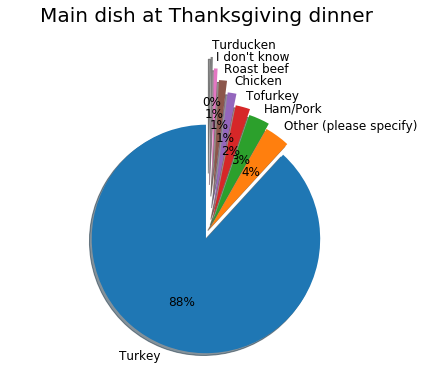

In [215]:
str_col = 'What is typically the main dish at your Thanksgiving dinner?'
counts = data[str_col].value_counts().tolist()
labels = data[str_col].value_counts().index.tolist()

#plotting    
fig = plt.figure(figsize=(7,6))
ax = plt.subplot()

explode = (0.1,0,0.05,0.1,0.2,0.3,0.4,0.5)
ax.pie(counts, labels=labels, explode=explode, autopct='%1.0f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Main dish at Thanksgiving dinner')

plt.show()

<br>

### Q2: How many had gravy with Tofurkey

In [7]:
str_col = 'Do you typically have gravy?'
str_col_two = 'What is typically the main dish at your Thanksgiving dinner?'

sel = data[str_col_two]=='Tofurkey'
print(data.loc[sel, str_col].value_counts())

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64


<br>

### Q3: How many ate pie

In [8]:
str_col = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'
apple_isnull = data[str_col].isnull()

str_col = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'
pumpkin_isnull = data[str_col].isnull()

str_col = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'
pecan_isnull = data[str_col].isnull()

ate_pies = apple_isnull & pumpkin_isnull & pecan_isnull

#print(ate_pies.unique())
print('True means no pie of any type')
print(ate_pies.value_counts())

True means no pie of any type
False    876
True     104
dtype: int64


<br>

### Q4: Age groups: show data in table
+convert string intervals, e.g. '18-29', to ints (representing the lower bound of the interval)

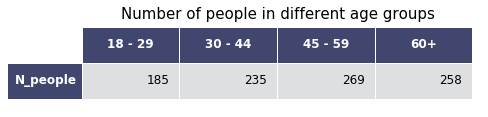

In [38]:
import six

#original Age columns: '18 - 29', '30 - 44', '45 - 60', '60+''
def str_to_int(input_string):    
    if pd.isnull(input_string):
        return None
    else:
        split_string = input_string.split(' ')       
        split_string = re.sub('\+', '', split_string[0])        
        return int(split_string)
    
data['int_age']=data['Age'].apply(str_to_int)

#show data in table
counts = [data['Age'].value_counts().sort_index().tolist()]
columns = data['Age'].value_counts().sort_index().index.tolist()

 
fig = plt.figure(figsize=(7,1))
ax = plt.subplot()
ax = my_table(counts, columns, ['N_people'], ax, header_color='#40466e', row_colors=['#F2F4F5', '#DEDFE1'], 
              edge_color='w', header_columns=0, title='Number of people in different age groups')
   
plt.show()

<br>

### Q5: Household income: show in table and histogram

+convert string intervals, e.g. '$\$$50,000 to $\$$74,999', to ints (representing the lower bound of the interval)

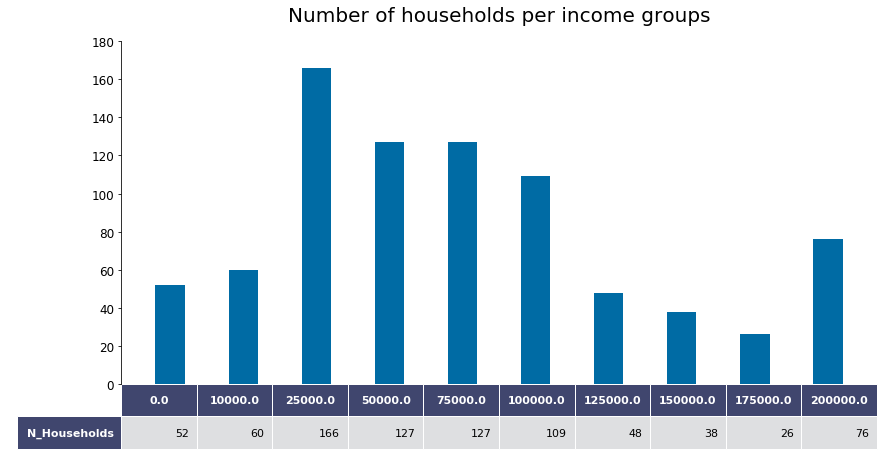

In [92]:
#origanl data:   '$75,000 to $99,999',  '$50,000 to $74,999'

str_col = 'How much total combined money did all members of your HOUSEHOLD earn last year?'

def str_to_int(input_str):
    if pd.isnull(input_str):
        return None
    else:
        #split the string to get only bottom end of interval or word 'Prefer'
        split_string = input_str.split(' ')
        #remove prefer not to answer
        if(split_string[0]=='Prefer'):
            return None
        else:
            split_string=re.sub('[\$,]','', split_string[0])
            return int(split_string)
        
data['int_income'] = data[str_col].apply(str_to_int)
#print(data['int_income'].value_counts().sort_index())


table_data = [data['int_income'].value_counts().sort_index().tolist()]
columns = data['int_income'].value_counts().sort_index().index.tolist()

fig = plt.figure(figsize=(15,7))
ax = plt.subplot()

bar_width = 0.4
index = np.arange(len(columns)) + 0.3
ax.bar(index, table_data[0], bar_width, color=colors[0])    
    
ax = my_table(table_data, columns, ['N_Households'], ax, header_color='#40466e', row_colors=['#F2F4F5', '#DEDFE1'], 
              edge_color='w', header_columns=0, loc='bottom',axis_off=0)
   
for key, spine in ax.spines.items():
    if(key=='top' or key=='right' or key=='bottom'):
        spine.set_visible(False)
        
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylim([0,180])
plt.xticks([])
plt.title('Number of households per income groups')

plt.show()

<br>

### Q6: What is the distance travelled for low and high income households?

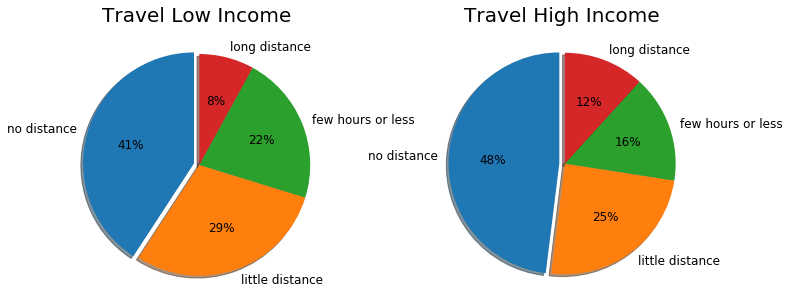

In [104]:
str_col='How far will you travel for Thanksgiving?'
low_income_travel = data.loc[data['int_income']<150000,str_col]
#print(low_income_travel.value_counts()/low_income_travel.value_counts().sum())
high_income_travel = data.loc[data['int_income']>150000,str_col]
#print(high_income_travel.value_counts()/high_income_travel.value_counts().sum())

#plotting    
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

explode = (0.05, 0, 0, 0)
labels = ['no distance', 'little distance', 'few hours or less', 'long distance']
ax1.pie(low_income_travel.value_counts(), labels=labels, explode=explode,
        autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Travel Low Income')

ax2.pie(high_income_travel.value_counts(), labels=labels, explode=explode, 
        autopct='%1.0f%%', shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Travel High Income')

plt.show()

richer people tend to marginally stay closer

<br>

### Q7: Check for Friendsgiving by age and income (pivot tables)

In [162]:
str_col_one = 'Have you ever tried to meet up with hometown friends on Thanksgiving night?'
str_col_two = 'Have you ever attended a "Friendsgiving?"'

print(data.pivot_table(index = str_col_one, columns = str_col_two, values='int_age'))
pivot_1 = data.pivot_table(index = str_col_one, columns = str_col_two, values='int_age')
print("")
print(data.pivot_table(index = str_col_one, columns = str_col_two, values = 'int_income'))

Have you ever attended a "Friendsgiving?"                  No        Yes
Have you ever tried to meet up with hometown fr...                      
No                                                  42.283702  37.010526
Yes                                                 41.475410  33.976744

Have you ever attended a "Friendsgiving?"                     No           Yes
Have you ever tried to meet up with hometown fr...                            
No                                                  78914.549654  72894.736842
Yes                                                 78750.000000  66019.736842


friendsgiving much more likely to young low income

<br>

### Q8: What is most common dessert?

None: 295.00
Ice cream: 266.00
Cookies: 204.00
Cheesecake: 191.00
Other (please specify): 134.00
Brownies: 128.00
Apple cobbler: 110.00
Peach cobbler: 103.00
Carrot cake: 72.00
Fudge: 43.00
Blondies: 16.00


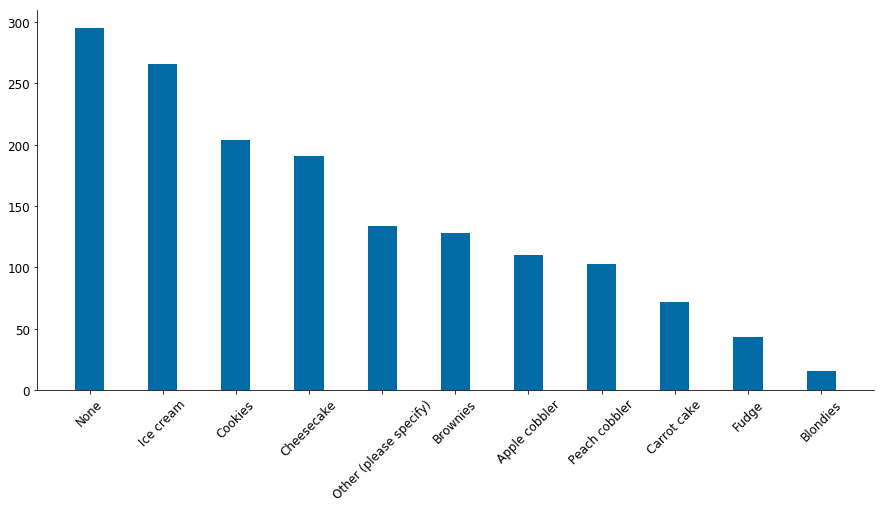

In [151]:
#example of question to process:
#Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Apple cobbler

#identify the right columns in the entire df (the ones with the word dessert on it)
def is_dessert(input_str):
    if re.search('dessert',input_str):
        return input_str
    else:
        return False
    
str_col = []    
columns = data.columns
for element in columns:
    #for columns with desert on it, slipt the sentece to extract the names of individual desserts
    if is_dessert(element)!= False:
        str_col.append(is_dessert(element).split('- ')[1])        
        str_basis = is_dessert(element).split('-')[0]+'- '   
str_col.remove('Other (please specify).1')  

dessert_names=[]
for element in str_col:
    dessert_names.append(str_basis+element)
 
dessert_counts={}
for idx, element in enumerate(dessert_names):    
    is_dessert = ~data[element].isnull()
    dessert_counts[str_col[idx]]=(len(is_dessert[is_dessert==True]))

dessert_counts = sort_dict(dessert_counts)    
print_dict(dessert_counts) 

fig = plt.figure(figsize=(15,7))
ax = plt.subplot()

bar_width = 0.4
index = np.arange(len(dessert_counts)) + 0.1
ax.bar(index, dessert_counts.values(), bar_width, color=colors[0])    
ax.set_xticks(index)
ax.set_xticklabels(dessert_counts.keys(), rotation=45)

for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)

plt.show()

Potential next steps:

- Figure out the most common complete meal people eat.
- Identify how many people work on Thanksgiving.
- Find regional patterns in the dinner menus.
- Find age, gender, and income based patterns in dinner menus.